<a href="https://colab.research.google.com/github/santhoshravib/SpotifyProject/blob/main/SanthoshRavindrabharathySpotifyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tracking Music Trends: Spotify Songs and Artists Over Time

This project focuses on identifying trends in song and artist popularity over time by analyzing streaming data from Spotify. The goal is to discover how music trends have evolved and to determine the most-streamed songs and artists by year and overall.

Here’s a breakdown of the approach:

1. Loading Libraries and Data
2. Data Preparation
3. Top Songs by Year
4. Top 10 Songs Overall
5. Time Series Plot
6. Scatter Plot of Streams vs. Release Year
7. Correlation Check
8. Regression Analysis
9. Artist Analysis


This project offers insights into streaming patterns and the staying power of artists and songs across various periods.


Step 1 - **Loading Libraries and Data**: Essential libraries (`pandas`, `matplotlib`, `seaborn`) are imported, and the Spotify dataset is loaded from Google Drive into a DataFrame to begin the analysis.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

filepath = '/content/drive/My Drive/spotify-2023-txt.csv'
spotify_data = pd.read_csv(filepath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2 - **Data Preparation**: Key columns are selected to create a new DataFrame `spotify_updated`. The release date, initially split into separate year, month, and day columns, is concatenated into a single `release_date` column formatted as `YYYY-MM-DD`. Unnecessary columns are then dropped, and the streams column is converted to integers.

In [21]:
spotify_updated = spotify_data[["track_name", "artist(s)_name", "released_year", "released_month", "released_day", "streams"]]

spotify_updated['release_date'] = spotify_updated['released_year'].astype(str) + '-' + spotify_updated['released_month'].astype(str) + '-' + spotify_updated['released_day'].astype(str)

spotify_updated['release_date'] = pd.to_datetime(spotify_updated['release_date'], format='%Y-%m-%d')

spotify_updated = spotify_updated.drop(columns=['released_year', 'released_month', 'released_day'])

spotify_updated.insert(3, 'release_date', spotify_updated.pop('release_date'))

spotify_updated['streams'] = pd.to_numeric(spotify_updated['streams'], errors='coerce')
spotify_updated = spotify_updated[spotify_updated['streams'].notnull()]
spotify_updated['streams'] = spotify_updated['streams'].astype(int)

spotify_updated.head(50)

<ipython-input-21-fcf151b9f4e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_updated['release_date'] = spotify_updated['released_year'].astype(str) + '-' + spotify_updated['released_month'].astype(str) + '-' + spotify_updated['released_day'].astype(str)
<ipython-input-21-fcf151b9f4e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_updated['release_date'] = pd.to_datetime(spotify_updated['release_date'], format='%Y-%m-%d')


,track_name,artist(s)_name,streams,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703,2023-07-14
1,LALA,Myke Towers,133716286,2023-03-23
2,vampire,Olivia Rodrigo,140003974,2023-06-30
3,Cruel Summer,Taylor Swift,800840817,2019-08-23
4,WHERE SHE GOES,Bad Bunny,303236322,2023-05-18
5,Sprinter,"Dave, Central Cee",183706234,2023-06-01
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",725980112,2023-03-16
7,Columbia,Quevedo,58149378,2023-07-07
8,fukumean,Gunna,95217315,2023-05-15
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",553634067,2023-03-17


Step 3 - **Top Songs by Year**: The data is sorted in descending order by stream count, grouped by year, and the top-streamed song for each year is extracted and displayed.

In [22]:
top_songs_by_year = spotify_updated.sort_values('streams', ascending=False).groupby(spotify_updated['release_date'].dt.year).first()
print(top_songs_by_year[['track_name', 'artist(s)_name', 'streams']])

                                                     track_name  \
release_date                                                      
1930                                                Agudo M  gi   
1942                                            White Christmas   
1946          The Christmas Song (Merry Christmas To You) - ...   
1950                     Let It Snow! Let It Snow! Let It Snow!   
1952                   A Holly Jolly Christmas - Single Version   
1957                                           Jingle Bell Rock   
1958                          Rockin' Around The Christmas Tree   
1959                     Let It Snow! Let It Snow! Let It Snow!   
1963                   It's the Most Wonderful Time of the Year   
1968                               Have You Ever Seen The Rain?   
1970                                              Feliz Navidad   
1971                                   Happy Xmas (War Is Over)   
1973                                                   Dream O

Step 4 - **Top 10 Songs Overall**: The data is sorted again by streams, and the top 10 most-streamed songs across all years are identified.

In [23]:
spotify_updated.sort_values('streams', ascending=False).head(10)

,track_name,artist(s)_name,streams,release_date
55,Blinding Lights,The Weeknd,3703895074,2019-11-29
179,Shape of You,Ed Sheeran,3562543890,2017-01-06
86,Someone You Loved,Lewis Capaldi,2887241814,2018-11-08
620,Dance Monkey,Tones and I,2864791672,2019-05-10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550,2018-10-09
162,One Dance,"Drake, WizKid, Kyla",2713922350,2016-04-04
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2665343922,2021-07-09
140,Believer,Imagine Dragons,2594040133,2017-01-31
725,Closer,"The Chainsmokers, Halsey",2591224264,2016-05-31
48,Starboy,"The Weeknd, Daft Punk",2565529693,2016-09-21


Step 5 - **Time Series Plot**: A time series plot of total streams over time is created using `matplotlib`, showing overall streaming trends and changes in popularity by date.

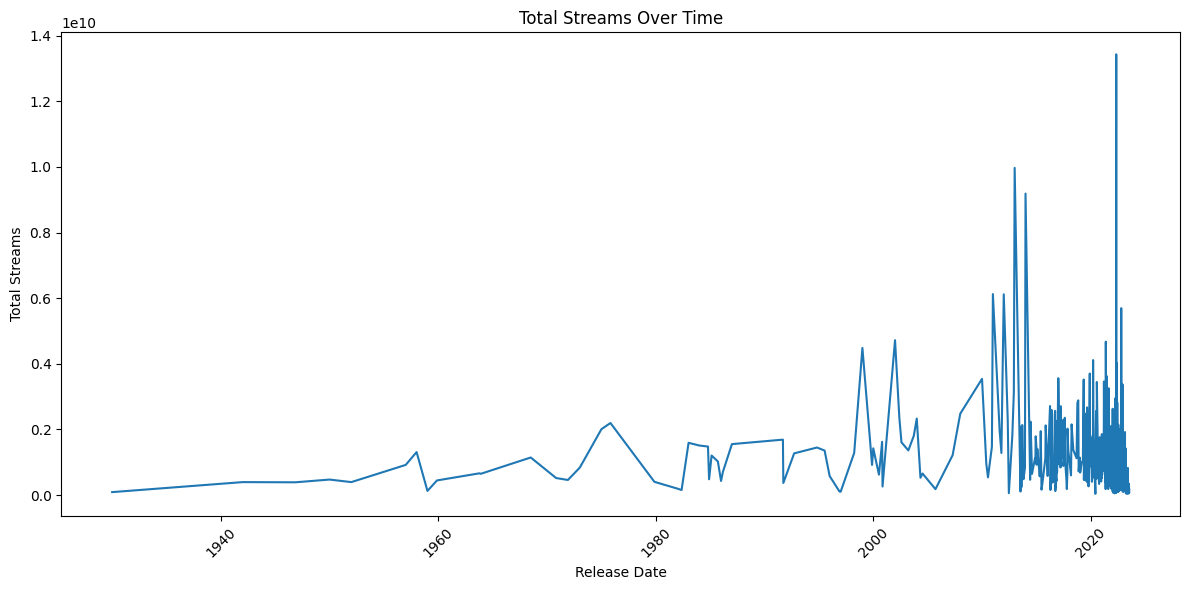

In [24]:
streams_over_time = spotify_updated.groupby('release_date')['streams'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(streams_over_time['release_date'], streams_over_time['streams'])
plt.xlabel('Release Date')
plt.ylabel('Total Streams')
plt.title('Total Streams Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Step 6 - **Scatter Plot of Streams vs. Release Year**: A scatter plot is created to compare stream counts with song release years, giving a visual overview of how streaming numbers vary based on song age.

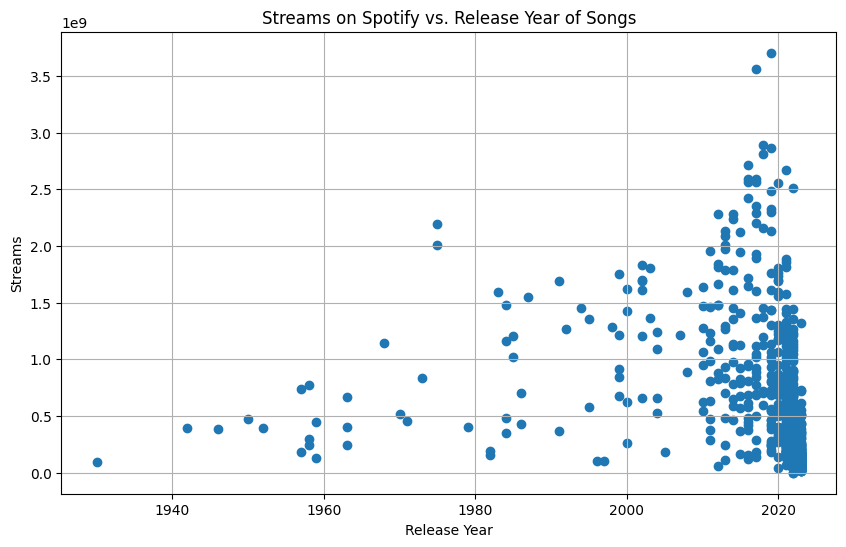

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(spotify_updated['release_date'].dt.year, spotify_updated['streams'])
plt.xlabel('Release Year')
plt.ylabel('Streams')
plt.title('Streams on Spotify vs. Release Year of Songs')
plt.grid(True)
plt.show()

Step 7 - **Correlation Check**: The correlation between streams and release year is calculated using Pearson’s method, revealing a slight negative correlation, which may suggest that older songs tend to have fewer streams.

In [26]:
spotify_updated['streams'].corr(spotify_updated['release_date'], method='pearson')

-0.23081439596489312

Step 8 - **Regression Line**: A scatter plot with a regression line is created to visualize the negative correlation between streams and release year.

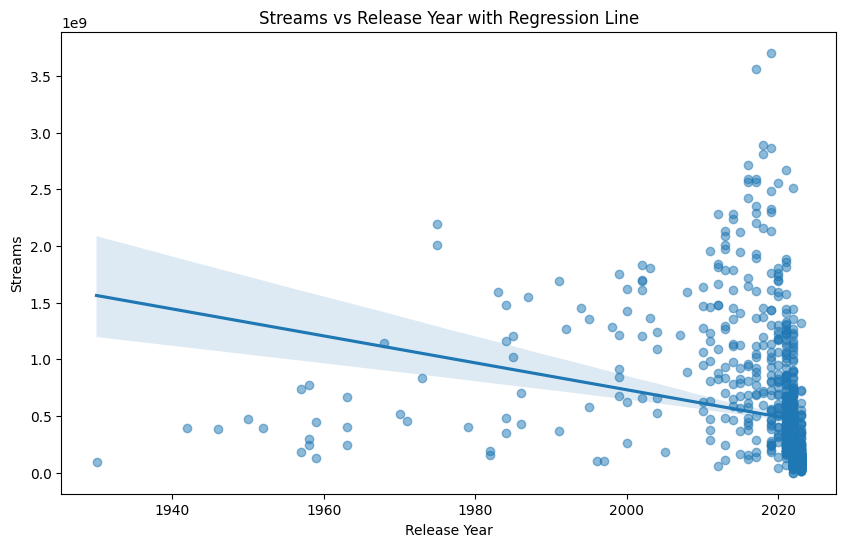

In [27]:
plt.figure(figsize=(10, 6))
spotify_updated['release_year'] = spotify_updated['release_date'].dt.year
sns.regplot(x='release_year', y='streams', data=spotify_updated, scatter_kws={'alpha':0.5})
plt.title('Streams vs Release Year with Regression Line')
plt.xlabel('Release Year')
plt.ylabel('Streams')
plt.show()

Step 9 - **Artist Analysis**: Split artists into separate entries for collaborations, distribute streams proportionally for each contributing artist, and find the artist with the highest cumulative streams. Display the top 10 most-streamed artists.

In [28]:
spotify_updated['artist_list'] = spotify_updated['artist(s)_name'].str.split(', ')
spotify_updated['weighted_streams'] = spotify_updated['streams'] / spotify_updated['artist_list'].apply(len)
spotify_exploded = spotify_updated.explode('artist_list')
artist_streams = spotify_exploded.groupby('artist_list')['weighted_streams'].sum().reset_index()
most_streamed_artist = artist_streams.loc[artist_streams['weighted_streams'].idxmax()]
print(f"The artist with the most streams is: {most_streamed_artist['artist_list']} with {most_streamed_artist['weighted_streams']} streams.")
top_10_artists = artist_streams.sort_values('weighted_streams', ascending=False).head(10)
print(top_10_artists.to_string(formatters={'weighted_streams': '{:,.0f}'.format}))

The artist with the most streams is: The Weeknd with 18883085827.0 streams.
        artist_list weighted_streams
628      The Weeknd   18,883,085,827
69        Bad Bunny   16,586,641,372
186      Ed Sheeran   14,612,767,461
608    Taylor Swift   14,342,018,242
245    Harry Styles   11,608,645,649
197          Eminem    8,188,766,428
471  Olivia Rodrigo    7,442,148,916
100      Bruno Mars    6,346,730,932
182        Dua Lipa    6,304,521,482
175        Doja Cat    6,207,623,429
